<a href="https://colab.research.google.com/github/ihwani-math/stocks_prediction/blob/main/LQ45_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tugas Sains Komputasi
Memprediksi salah satu saham indeks LQ45 (^JKLQ45) menggunakan metode LSTM

In [3]:
#Import library yang digunakan
import math
import pandas_datareader as web
import numpy as np
import yfinance as yf
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
#akses data
df = yf.download('BBNI.JK', start='2016-05-01', end='2024-05-21')
#tampilkan data
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-05-02,2290.0,2290.0,2235.0,2245.0,1787.617920,66135200
2016-05-03,2250.0,2335.0,2250.0,2315.0,1843.356567,143596200
2016-05-04,2315.0,2325.0,2260.0,2310.0,1839.375366,85179600
2016-05-09,2325.0,2325.0,2235.0,2245.0,1787.617920,79900800
2016-05-10,2250.0,2285.0,2225.0,2280.0,1815.487305,66174200
...,...,...,...,...,...,...
2024-05-14,4790.0,4940.0,4780.0,4930.0,4930.000000,70014900
2024-05-15,4880.0,5100.0,4850.0,5025.0,5025.000000,85730700
2024-05-16,5125.0,5275.0,5100.0,5200.0,5200.000000,118382400


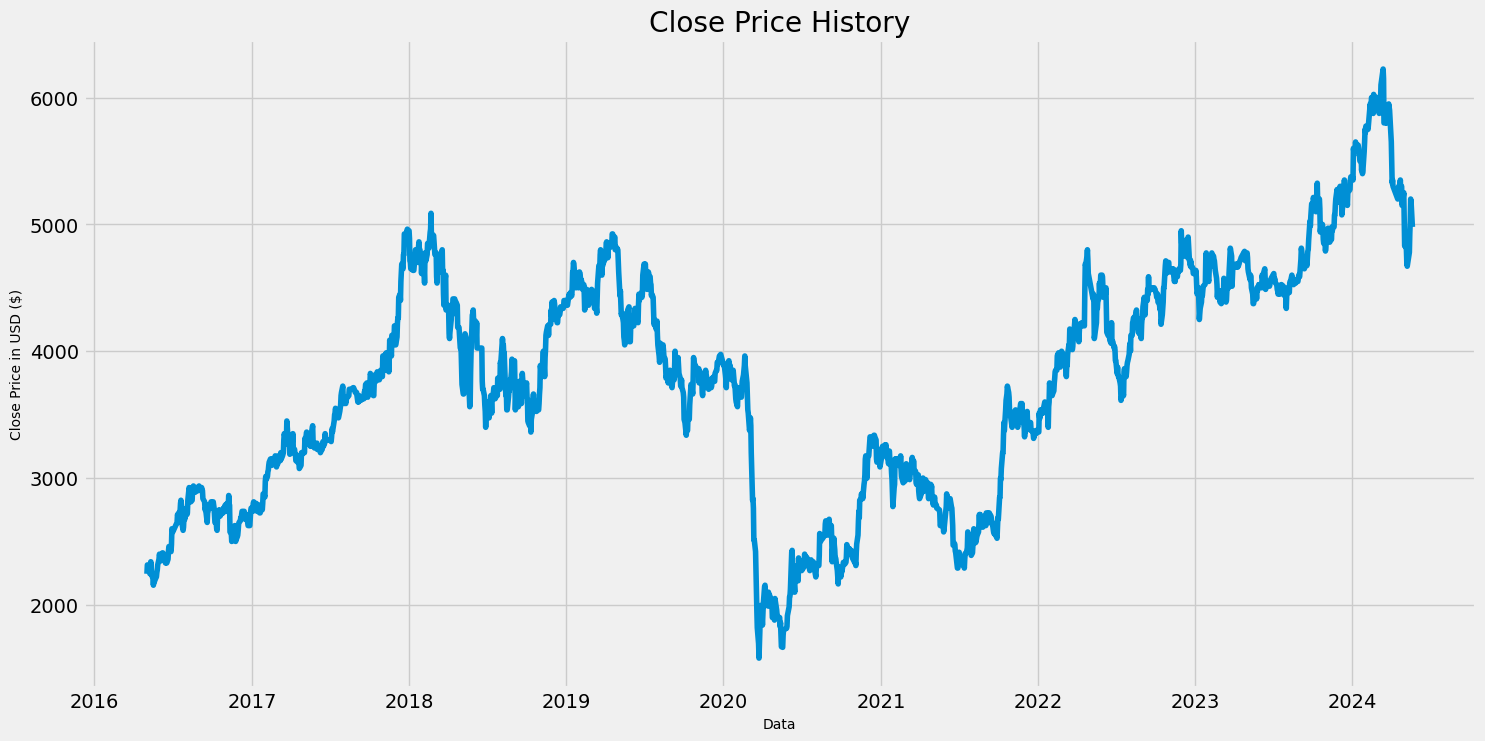

In [5]:
#visualisasi grafik histori harga penutupan
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Data', fontsize=10)
plt.ylabel('Close Price in USD ($)', fontsize=10)
plt.show()

In [6]:
#Membuat dataframe yang hanya berisi data 'Close'
data=df.filter(['Close'])
dataset=data.values
#jumlah baris yang menjadi model train
training_data_len=math.ceil(len(dataset)* .8)

training_data_len

1597

In [7]:
#Scale the data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

scaled_data

array([[0.14316469],
       [0.15823466],
       [0.15715823],
       ...,
       [0.77933262],
       [0.77395048],
       [0.73196986]])

In [8]:
#membuat dataset training
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []

In [9]:
for i in range (60, len(train_data)):
  x_train.append(train_data[i-60 : i, 0])
  y_train.append(train_data[i, 0])
  if i<=61 :
    print(x_train)
    print(y_train)
    print()

[array([0.14316469, 0.15823466, 0.15715823, 0.14316469, 0.15069968,
       0.16361679, 0.15392896, 0.14208827, 0.13455328, 0.12378902,
       0.13347686, 0.12917115, 0.131324  , 0.13670614, 0.13778256,
       0.14531755, 0.14962325, 0.15823466, 0.1679225 , 0.17653391,
       0.17330463, 0.16469322, 0.16576964, 0.17330463, 0.17868676,
       0.17868676, 0.17330463, 0.1722282 , 0.16469322, 0.16146394,
       0.16899892, 0.16254037, 0.16146394, 0.1679225 , 0.18191604,
       0.18945102, 0.18622174, 0.18622174, 0.18083961, 0.1926803 ,
       0.21959096, 0.21959096, 0.21420883, 0.23035522, 0.24381055,
       0.24111948, 0.23035522, 0.24650161, 0.24919268, 0.26264801,
       0.26803014, 0.25995694, 0.23035522, 0.21689989, 0.22228202,
       0.23842842, 0.24111948, 0.23573735, 0.25457481, 0.24919268])]
[0.24381054897739507]

[array([0.14316469, 0.15823466, 0.15715823, 0.14316469, 0.15069968,
       0.16361679, 0.15392896, 0.14208827, 0.13455328, 0.12378902,
       0.13347686, 0.12917115, 0.13

In [10]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1537, 60, 1)

In [11]:
#LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
model.compile(optimizer='adam', loss='mean_squared_error')
#train model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1537/1537 ━━━━━━━━━━━━━━━━━━━━ 52s 30ms/step - loss: 0.0049


In [13]:
#membuat dataset test
test_data=scaled_data[training_data_len - 60: 2037]
x_test=[]
y_test=dataset[training_data_len:, :]
for i in range (60, len(test_data)):
  x_test.append(test_data[i-60: i, 0])

In [14]:
x_test = np.array(x_test)

In [15]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [16]:
#model prediksi
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


In [17]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

64.5076448445332

In [18]:
train = data[: training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

<ipython-input-18-fac123c220ea>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


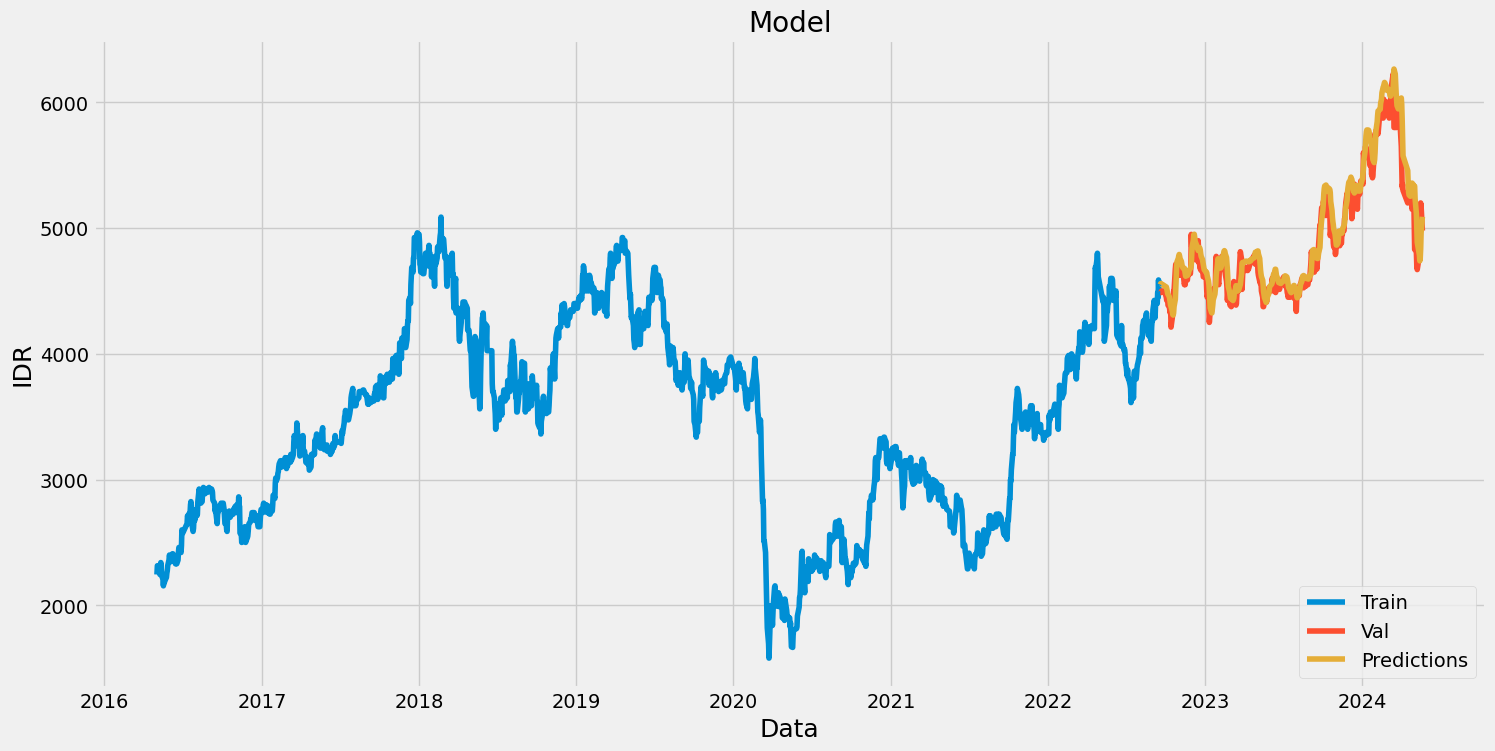

In [19]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Data',fontsize=18)
plt.ylabel('IDR',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [20]:
valid

,Close,Predictions
Date,,
2022-09-19,4487.5,4550.504395
2022-09-20,4487.5,4558.909668
2022-09-21,4487.5,4559.349609
2022-09-22,4500.0,4555.067383
2022-09-23,4500.0,4551.398438
...,...,...
2024-05-14,4930.0,4739.189941
2024-05-15,5025.0,4760.391113
2024-05-16,5200.0,4834.183105
